<a href="https://colab.research.google.com/github/ankita1200/Machine-Learning-Topics/blob/main/DecisionTrees_CARTAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CART Algo**
1. Classification and Regression Trees
2. CART is used to train decision trees
3. The algorithm works by first splitting the training set into two subsets using a single feature k and a threshold t (eg petal length <= 2.45)
4. How does it chose k,t ? It searches for the pair (k,t) that produces the purest subsets, weighted by their size- CART cost function .
5. Once the CART algo has successfully split the training set in two, it splits the subsets using the same logic, recursively.
6. It stops onces it reaches maximum depth, or it cannot find a split that will reduce impurity.

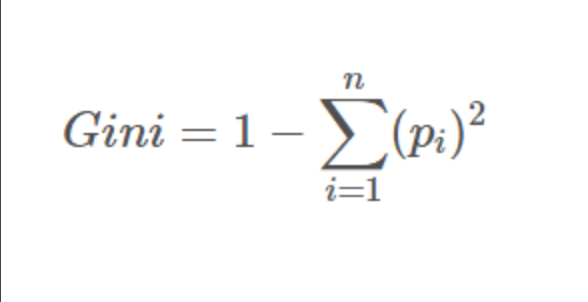

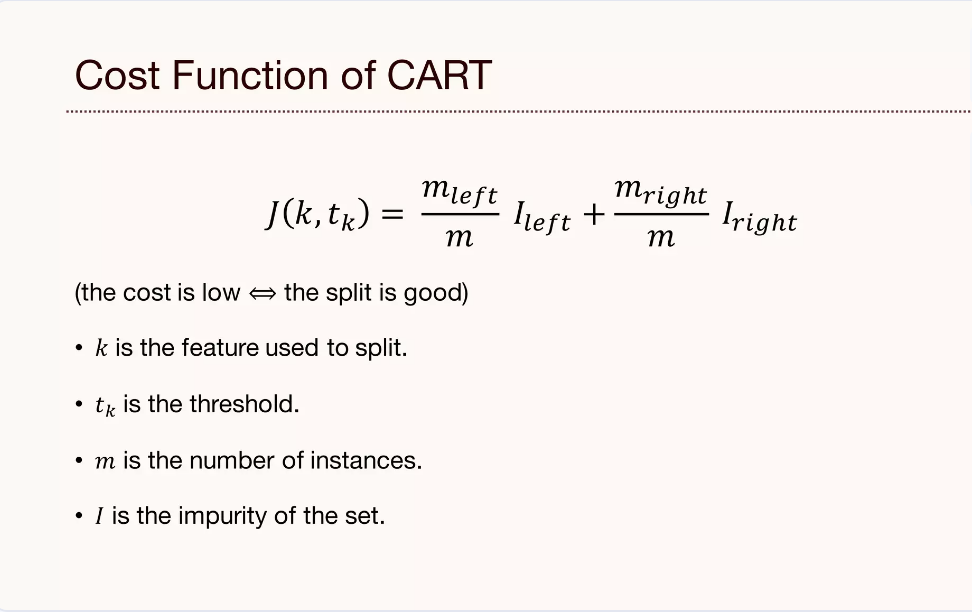

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor

**Implementing a Decision Tree Classifier**

In [ ]:
# defining a decision tree classifier Node
class DecisionTreeNode:
  def __init__(self, feature_index=None, threshold=None, left=None, right=None, *, value=None):
    self.feature_index = feature_index
    self.threshold = threshold
    self.left = left
    self.right = right
    self.value = value

  def isLeafNode(self):
    return self.value is not None

In [ ]:
# calculate Gini impurity
def gini_impurity(y):
  gini = 1
  labels = np.unique(y)
  for cls in labels:
    gini -= (np.sum(y==cls)/len(y))**2
  return gini

 The primary challenge in the implementation of Decision Tree classifier is to identify the attribute that we consider as root node at each level.- process is called attribute selection technique. 2 approaches
- Information gain - process assumes the attributes are categorical
- Gini Index - assumes the attributes are continuous


In [ ]:
# finding the best split
def best_split(X,y):
  best_gini = 1
  best_feature_index = None
  best_threshold = None

  for feature_index in range(X.shape[1]):
    thresholds = np.unique(X[:, feature_index])
    for threshold in thresholds:
      left_indices = X[:,feature_index] <= threshold
      right_indices = X[:, feature_index] > threshold
      if len(y[left_indices])==0 or len(y[right_indices])==0:
        continue
      gini_left = gini_impurity(y[left_indices])
      gini_right = gini_impurity(y[right_indices])
      gini = (np.sum(left_indices)*gini_left + np.sum(right_indices)*gini_right)/len(y)
      if gini < best_gini:
        best_gini = gini
        best_feature_index = feature_index
        best_threshold = threshold

  return best_feature_index, best_threshold

Algo -
1. Decision Tree Node - A decision Tree node has Feature_index, threshold on the feature the divides the samples into left_half and right_half, a pointer to left_half, a pointer to right_half. If it is a leaf node, it will have a class label value.

2. CART algo uses Gini Impurity. To calculate Gini Index need an array of class labels.

3. To identify the feature,threshold that best leads to information gain/ reduces impurity, the algo iterates through all possible feature,threshold pairs and returns the one for which the gini-impurity is minimum.
gini-impurity = left_half_szie* left_half_gini_index + right_half_szie*right_half_gini_index

4. Process 3 is repeated at each node, until a base condition is met, at which the class with maximum count is returned as value of leaf node.(base condition - either num_of_classes==1/ num_of_smaples < min_num_of_samples-required for split)
The tree is build recursivesly.

In [ ]:
# Building Tree Recursively
class DecisionTreeClassifierCustom:
  def __init__(self, max_depth=100, min_samples_split=2):
    self.max_depth = max_depth
    self.min_samples_split = min_samples_split
    self.root = None
    self._is_fitted = False

  def fit(self,X,y):
    self.root = self._build_tree(X,y)
    self._is_fitted = True

  def _build_tree(self,X,y, depth=0):
    num_of_samples, num_of_features = X.shape
    num_of_labels = len(np.unique(y))
    if depth >= self.max_depth or num_of_labels == 1 or num_of_samples < self.min_samples_split:
      leaf_value = self._most_common_label(y)
      return DecisionTreeNode(value=leaf_value)
    feature_index, threshold = best_split(X,y)
    if feature_index is None:
      leaf_value = self._most_common_label(y)
      return DecisionTreeNode(value=leaf_value)

    left_indices = X[:,feature_index] <= threshold
    right_indices = X[:, feature_index] > threshold
    left = self._build_tree(X[left_indices], y[left_indices], depth+1)
    right = self._build_tree(X[right_indices], y[right_indices], depth+1)
    print("feature_index: ",feature_index)
    print("threshold: ",threshold)
    return DecisionTreeNode(feature_index,threshold,left,right)


  def _most_common_label(self,y):
    labels, counts = np.unique(y, return_counts=True)
    return labels[np.argmax(counts)]

  def predict(self,x):
    return self._traverse_tree(x,self.root)

  def _traverse_tree(self,x,node):
    if node.isLeafNode():
      return node.value
    if x[node.feature_index] <= node.threshold:
      return self._traverse_tree(x,node.left)
    return self._traverse_tree(x,node.right)

  def print_tree(self, node, feature_names, class_names, depth=0):
    indent = "  " * depth
    if node.left is None and node.right is None:
        print(f"{indent}Predict class {class_names[node.value]}")
    else:
        print(f"{indent}If {feature_names[node.feature_index]} < {node.threshold:.2f}:")
        self.print_tree(node.left, feature_names, class_names, depth + 1)
        print(f"{indent}Else:")
        self.print_tree(node.right, feature_names, class_names, depth + 1)


In [ ]:
iris = load_iris()
X, y = iris.data, iris.target
X.shape

(150, 4)

In [ ]:
clf = DecisionTreeClassifierCustom()
clf.fit(X,y)
clf.print_tree(clf.root, iris.feature_names, iris.target_names)

feature_index:  3
threshold:  1.6
feature_index:  0
threshold:  6.7
feature_index:  3
threshold:  1.5
feature_index:  2
threshold:  4.9
feature_index:  0
threshold:  5.9
feature_index:  2
threshold:  4.8
feature_index:  3
threshold:  1.7
feature_index:  2
threshold:  1.9
If petal length (cm) < 1.90:
  Predict class setosa
Else:
  If petal width (cm) < 1.70:
    If petal length (cm) < 4.90:
      If petal width (cm) < 1.60:
        Predict class versicolor
      Else:
        Predict class virginica
    Else:
      If petal width (cm) < 1.50:
        Predict class virginica
      Else:
        If sepal length (cm) < 6.70:
          Predict class versicolor
        Else:
          Predict class virginica
  Else:
    If petal length (cm) < 4.80:
      If sepal length (cm) < 5.90:
        Predict class versicolor
      Else:
        Predict class virginica
    Else:
      Predict class virginica


1. Decision Trees are non-parametric models .
2. Non-parametric - The number of parameters is not determined prior to training so the model structure is free to stick closely to data - risking overfitting
In contrast, liner regression is a parametric model, bcoz it has predetermined number of parameters, so its degree of freedom is limited.

Conclusion:
1. Non-parametric model - high risk of overfitting
2. parametric model - high risk of underfitting

DecisionTreeClassifier has following hyperparameters:
1. max_features - max features that are evaluated for splitting at each node
2. max_leaf_nodes - maximum number of leaf nodes
3. min_samples_split - minimium number of samples a node must have before it can be split


In [ ]:
# How to measure performance of Decision Trees

**Decision Tree Regression**

[Text(0.5, 0.8333333333333334, 'x[0] <= -0.303\nsquared_error = 0.006\nsamples = 200\nvalue = 0.088'),
 Text(0.25, 0.5, 'x[0] <= -0.408\nsquared_error = 0.002\nsamples = 44\nvalue = 0.172'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.001\nsamples = 20\nvalue = 0.213'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.001\nsamples = 24\nvalue = 0.138'),
 Text(0.75, 0.5, 'x[0] <= 0.272\nsquared_error = 0.005\nsamples = 156\nvalue = 0.065'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.001\nsamples = 110\nvalue = 0.028'),
 Text(0.875, 0.16666666666666666, 'squared_error = 0.002\nsamples = 46\nvalue = 0.154')]

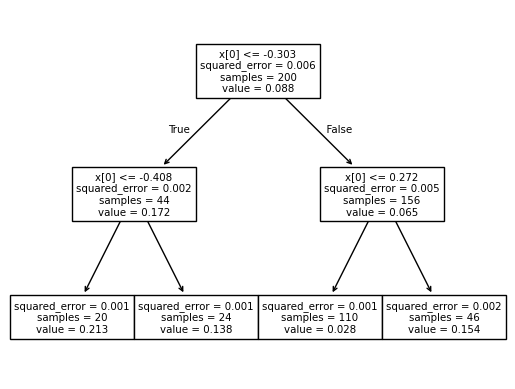

In [ ]:
np.random.seed(42)
X = np.random.rand(200,1) - 0.5
y = X**2 + 0.025 * np.random.randn(200,1)
reg = DecisionTreeRegressor(max_depth=2, random_state=42)
reg.fit(X,y)
tree.plot_tree(reg)

Note -
1. samples - no of samples that fall in the category of node.
2. value - is the average y value of all the 'samples' at that node.
3. The decision tree splits the output space in a way that the training instances are close to the predicting value as much as possible.


**The CART Algorithm works in similar manner, except that instead of minimizing input space it minimizes the mean square error**

Limitation of Decision Trees -
The decision boundaries are perpendicular to axis. So decision trees are sensitive to data orientation .
Solution -
1. Scale the data
2. Apply PCA transformation to reduce correlation between features

In [8]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [9]:
# PCA - rotates the data in a way that reduces corr
iris = load_iris()
X_iris, y_iris = iris.data, iris.target
pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=2)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=2)

Decision Trees has a high variance.
Why ? Decision Tree Algorithm is stochastic in nature. It randomaly selects the set of features to evaluate at each node, even retraining the exact decision tree on exact data may produce very different models
Solution - It is possible to reduce variance, by averaging predictions over many trees.- This is called ensemble learning.

**How to deal with High Variance of Decision Trees - Ensemble Learning- Avearging predictions over several trees**